In [234]:
import pandas as pd
import os
import matplotlib.pyplot as plt

### Mergining 12 months of sales data into a single file

In [235]:
df1 = pd.read_csv("./Sales_Data/Sales_April_2019.csv")

 os.listdir() method gets the list of all files and directories in a specified directory. By default, it is the current directory. Beyond the first level of folders, os.listdir() does not return any files or folders.

In [236]:
sale_path = "./Sales_Data"
dir_list_1 = os.listdir(sale_path)





#concatFilesFromDir does create new data frame contain concatinate all files in the directory
#param Dir
#param currentPathName: current path name of the directory
def concatFilesFromDir(Dir, currentPathName):
    all_file = pd.DataFrame()
    for file in Dir:
        current_file= pd.read_csv(currentPathName + "/"+ file) #read current file
        all_file = pd.concat([all_file, current_file]) #concat files
    return all_file

all_file = concatFilesFromDir(dir_list_1, sale_path)
all_file = all_file.dropna(how='all') #drop file with NaN values
all_file.to_csv("all_file.csv", index = False)
# all_file.head(100)


Read in updated dataframe

### Question1: What was the best month for sales? How much was earned tha month?

<function matplotlib.pyplot.show(close=None, block=None)>

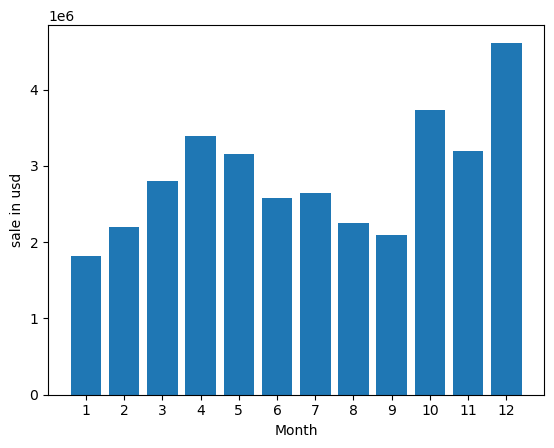

In [237]:
#delete 'or' in order date.
all_file = all_file[all_file['Order Date'].str[0:2] != 'Or'] # see where the error happen

#Add Month column.
all_file['Month'] = all_file['Order Date'].str[0:2]

#Convert colums to correct type
all_file['Month'] = all_file['Month']
all_file['Quantity Ordered'] = pd.to_numeric(all_file['Quantity Ordered'])
all_file['Price Each'] = pd.to_numeric(all_file['Price Each'])



#find per_order_sale_value = 'Quantity Ordered' * 'Price Each'
all_file['per_order_sale_value'] = all_file['Quantity Ordered'] * all_file['Price Each']

# Find best month with best sale

monthly_sale_value_y = all_file.groupby('Month').sum('numeric_only')
months_x = range(1,13)

plt.bar(months_x, monthly_sale_value_y['per_order_sale_value'])
plt.xticks(months_x)
plt.ylabel('sale in usd')
plt.xlabel('Month')
plt.show

### Answer ----> December have highest sale 

### Question2: What city had the highest number of sales.

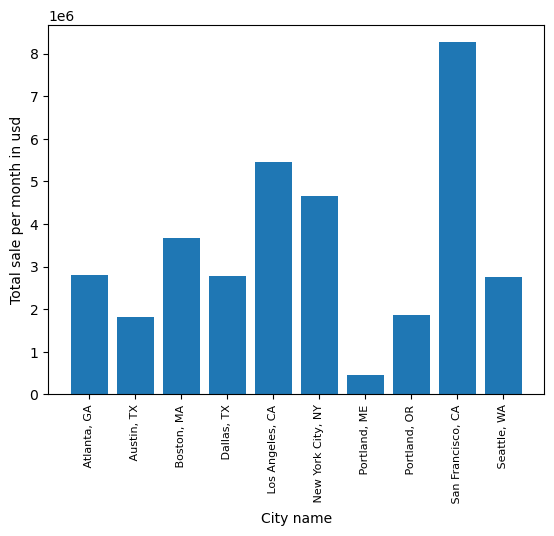

In [247]:
all_file.head(50)
temp_file = all_file

#function get_city 
def get_city(adress):
    return adress.split(',')[1]

#function get_state
def get_state(adress):
    return (adress.split(',')[2]).split(' ')[1]


#apply function on the col using lambda to get the city name
temp_file['City'] = temp_file['Purchase Address'].apply(lambda x: get_city(x))
temp_file['City'] = temp_file['City'] + ', '+ temp_file['Purchase Address'].apply(lambda x: get_state(x))

cities_x = [city for city, df in temp_file.groupby('City')]
cities_sale_values_y = temp_file.groupby('City').sum('numeric_only')['per_order_sale_value']

plt.bar(cities_x, cities_sale_values_y)
plt.xticks(cities_x, rotation ='vertical', size=8)
plt.ylabel('Total sale per month in usd')
plt.xlabel('City name')
plt.show()
